In [1]:
import tqdm
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import svm
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
TR_PREPROC_PATH = "../data/tr_preprocessed.csv"
NOT_TR_PREPROC_PATH = "../data/not_tr_preprocessed.csv"

USE_BINARY_CLASSIFICATION = True

In [63]:
df_translated = pd.read_csv(TR_PREPROC_PATH)
df_not_translated = pd.read_csv(NOT_TR_PREPROC_PATH)

### Check standard deviations to check whether we have features with zero std.

In [64]:
df_translated[1:].std()

page_age_days                        1006.464345
revisions_count_mean                   27.838649
revisions_count_std                     1.206288
revisions_count_ar                      0.330867
revisions_count_max                    28.258283
revisions_count_min                    27.600416
revisions_count_range                   3.457992
revisions_count_avg_last_week          28.151046
revisions_count_avg_all_period         27.838649
contributors_count_mean                 9.252606
contributors_count_std                  0.403112
contributors_count_ar                   0.301397
contributors_count_max                  9.385664
contributors_count_min                  9.181709
contributors_count_range                1.183288
contributors_count_avg_last_week        9.353013
contributors_count_avg_all_period       9.252606
num_of_views_mean                       7.094336
num_of_views_std                        5.494361
num_of_views_ar                         0.088670
num_of_views_max    

In [65]:
df_not_translated[1:].std()

page_age_days                        1274.641122
revisions_count_mean                   22.647687
revisions_count_std                     0.362197
revisions_count_ar                      0.186203
revisions_count_max                    22.710603
revisions_count_min                    22.602332
revisions_count_range                   0.955071
revisions_count_avg_last_week          22.698401
revisions_count_avg_all_period         22.647687
contributors_count_mean                 6.603613
contributors_count_std                  0.080930
contributors_count_ar                   0.158822
contributors_count_max                  6.615452
contributors_count_min                  6.592249
contributors_count_range                0.199156
contributors_count_avg_last_week        6.613865
contributors_count_avg_all_period       6.603613
num_of_views_mean                       0.277364
num_of_views_std                        0.177393
num_of_views_ar                         0.078749
num_of_views_max    

### Correlational maps

In [66]:
df_tr_numeric_only = df_translated.drop(['page_name'], axis = 1)
df_not_tr_numeric_only = df_not_translated.drop(['page_name'], axis = 1)

In [67]:
corr_map = df_tr_numeric_only.drop(['translated'], axis = 1).corr()

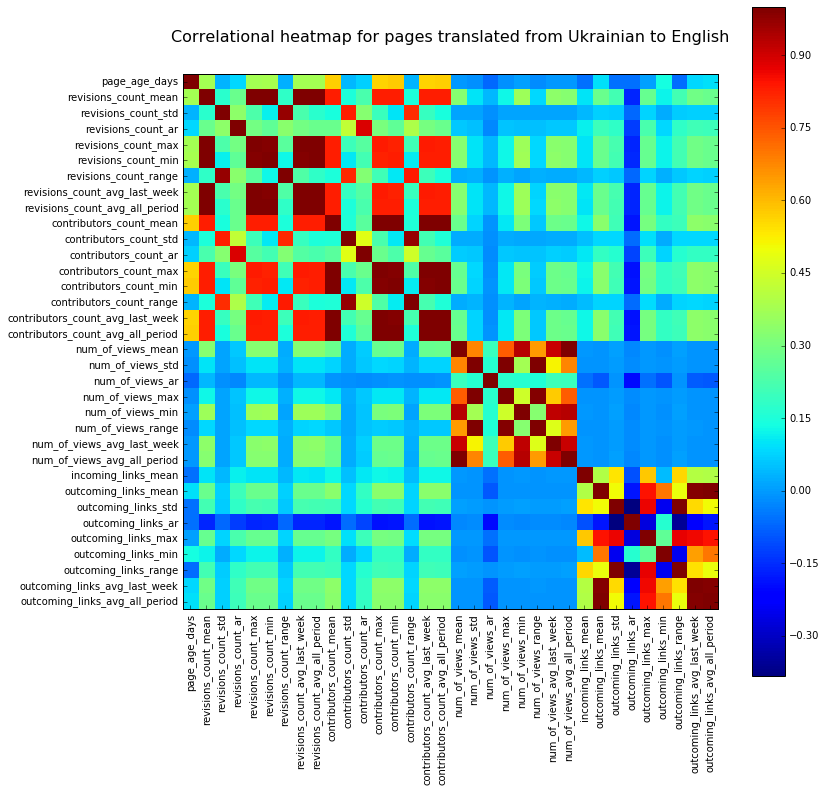

In [68]:
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals

labels = list(corr_map.columns)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_map)
fig.colorbar(cax)

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(loc)

plt.xticks(rotation = 90,)
plt.title("Correlational heatmap for pages translated from Ukrainian to English", fontsize = 16)
plt.show()
# scatter_matrix(df_translated[1:9], alpha=0.2, figsize=(8, 8), diagonal='kde') #gives singular matrix error

In [69]:
corr_map

,page_age_days,revisions_count_mean,revisions_count_std,revisions_count_ar,revisions_count_max,revisions_count_min,revisions_count_range,revisions_count_avg_last_week,revisions_count_avg_all_period,contributors_count_mean,...,num_of_views_avg_all_period,incoming_links_mean,outcoming_links_mean,outcoming_links_std,outcoming_links_ar,outcoming_links_max,outcoming_links_min,outcoming_links_range,outcoming_links_avg_last_week,outcoming_links_avg_all_period
page_age_days,1.000000,0.378255,0.036824,0.085695,0.374404,0.379489,0.030639,0.375756,0.378255,0.570751,...,-0.000302,-0.056079,0.092375,-0.058989,-0.056595,0.008977,0.140430,-0.062209,0.082815,0.092375
revisions_count_mean,0.378255,1.000000,0.167966,0.276369,0.996968,0.998262,0.179352,0.998066,1.000000,0.831813,...,0.327860,0.101795,0.277939,0.216104,-0.157675,0.273872,0.123196,0.212601,0.289641,0.277939
revisions_count_std,0.036824,0.167966,1.000000,0.337010,0.230977,0.114794,0.971285,0.222445,0.167966,0.143626,...,0.015766,0.041416,0.072928,0.066903,-0.065414,0.079507,0.025482,0.066935,0.074956,0.072928
revisions_count_ar,0.085695,0.276369,0.337010,1.000000,0.296356,0.261444,0.335046,0.292181,0.276369,0.281162,...,0.061797,0.115886,0.205031,0.181008,-0.125811,0.223405,0.082649,0.182476,0.207482,0.205031
revisions_count_max,0.374404,0.996968,0.230977,0.296356,1.000000,0.992612,0.249222,0.999704,0.996968,0.829039,...,0.324667,0.102843,0.279184,0.217358,-0.160535,0.275369,0.123596,0.213902,0.290816,0.279184
revisions_count_min,0.379489,0.998262,0.114794,0.261444,0.992612,1.000000,0.129877,0.993916,0.998262,0.830237,...,0.329530,0.100499,0.276455,0.214500,-0.155997,0.272099,0.122876,0.210982,0.288134,0.276455
revisions_count_range,0.030639,0.179352,0.971285,0.335046,0.249222,0.129877,1.000000,0.236399,0.179352,0.148162,...,0.022954,0.038281,0.074901,0.064163,-0.066761,0.078492,0.029266,0.063997,0.076736,0.074901
revisions_count_avg_last_week,0.375756,0.998066,0.222445,0.292181,0.999704,0.993916,0.236399,1.000000,0.998066,0.830400,...,0.324885,0.103076,0.279080,0.217773,-0.160204,0.275601,0.123214,0.214328,0.290764,0.279080
revisions_count_avg_all_period,0.378255,1.000000,0.167966,0.276369,0.996968,0.998262,0.179352,0.998066,1.000000,0.831813,...,0.327860,0.101795,0.277939,0.216104,-0.157675,0.273872,0.123196,0.212601,0.289641,0.277939
contributors_count_mean,0.570751,0.831813,0.143626,0.281162,0.829039,0.830237,0.148162,0.830400,0.831813,1.000000,...,0.277401,0.125904,0.332377,0.209815,-0.183356,0.298567,0.189223,0.203917,0.338510,0.332377


### Create train and test data sets

In [77]:
train_ratio = 0.8
np.random.seed(42)

df_tr_array = np.array(df_translated)
df_not_tr_array = np.array(df_not_translated)

if USE_BINARY_CLASSIFICATION:

    total_dataset_size = df_tr_array.shape[0] + df_not_tr_array.shape[0]
    train_size = int(train_ratio * total_dataset_size)
    test_size = int((1-train_ratio)*total_dataset_size)+1
    
    train = np.vstack((df_tr_array[:train_size//2,:], df_not_tr_array[:train_size//2,:]))
    np.random.shuffle(train)
    X_train = train[:,1:-1]
    y_train = train[:,-1]
    
    test = np.vstack((df_tr_array[train_size//2:,:], df_not_tr_array[train_size//2:,:]))
    np.random.shuffle(test)  
    X_test = test[:,1:-1]
    y_test = test[:,-1]

    print("Test X dataset shape: {0}\nTrain X dataset shape: {1}".format(X_train.shape, X_test.shape))
    print("Test Y dataset shape: {0}\nTrain Y dataset shape: {1}".format(y_train.shape, y_test.shape))
    
else:
    # for one clas classification case
    train_size = int(train_ratio * df_tr_array.shape[0])
    test_size = int((1-train_ratio)*df_tr_array.shape[0])+1

    X_train = df_tr_array[:train_size,:-1]
    X_test = df_tr_array[train_size:,:-1]
    X_outliers = df_not_tr_array[:test_size,:-1]
    print("Test dataset shape: {0}\nTrain dataset shape: {1}\nOutliers dataset shape: {2}".
          format(X_train.shape, X_test.shape, X_outliers.shape))

Test X dataset shape: (8434, 34)
Train X dataset shape: (2109, 34)
Test Y dataset shape: (8434,)
Train Y dataset shape: (2109,)


In [72]:
def apply_one_class_classifier():
    # source: http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html 

    # fit the model
    clf = svm.OneClassSVM(nu=0.2, random_state=42)
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_outliers = clf.predict(X_outliers)

    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

    train_accuracy = 1 - n_error_train/y_pred_train.size
    translated_test_accuracy = 1 - n_error_test/test_size
    full_test_accuracy = 1 - (n_error_test+n_error_outliers)/(test_size*2)

    print("Train acc: ",train_accuracy)
    print("Test accuracy on translated: ", translated_test_accuracy)
    print("Full test accuracy: ", full_test_accuracy)
    
    print("predicted classes of test translated:")
    display(y_pred_test)
    print("predicted classes of test non translated:")
    display(y_pred_outliers)

In [142]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV


def apply_binary_classifier(classifier = 'XGBC'):
    if classifier == 'XGBC':
        model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_delta_step=0,
           max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
           n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
           subsample=0.8)
        
    elif classifier == 'SVC':
        model = SVC()
    else: raise Exception('Such classifier is not available.')
        
    model.fit(X_train, y_train)
    print("Model:\n{}\n".format(model))
    
    # make predictions for test data
    y_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    
    # evaluate predictions
    print(classification_report(list(y_test), list(y_pred)))
    accuracy = accuracy_score(list(y_test), list(y_pred))
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    roc_auc = roc_auc_score(list(y_test), list(y_pred))
    print("AUROC: %.2f%%" % (roc_auc * 100.0))
    
    return(y_pred, y_proba)
    
    
def grid_search_XGBoost():
    param_grid = {
    #     'learning_rate': [0.01, 0.05, 0.1],
    #     'n_estimators': [ 100,  200, 250, 300],
    #     'max_depth': [5, 6, 7, 8, 9],
        'gamma': [0, 0.1, 0.5, 1],
        'min_child_weight':[1,3,5]
    }
    gsearch = GridSearchCV(
        estimator = XGBClassifier( 
    #         learning_rate = 0.1, 
            n_estimators = 200, max_depth = 5,
    #         gamma = 0.1, min_child_weight = 3,
            subsample = 0.8, colsample_bytree = 0.8,
            n_jobs=1, nthread=None, objective='binary:logistic', 
            random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
            seed=42, silent=True), 
        param_grid = param_grid, 
        scoring='roc_auc',
        n_jobs=4,
        iid=False, 
        cv=5)
    gsearch.fit(X_train, y_train)
    gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

In [143]:
if USE_BINARY_CLASSIFICATION:
    y_pred, y_proba = apply_binary_classifier('XGBC')
else:
    y_pred, y_proba = apply_one_class_classifier('SVC')

Model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8)

             precision    recall  f1-score   support

          0       0.96      0.93      0.94       779
          1       0.96      0.98      0.97      1330

avg / total       0.96      0.96      0.96      2109

Accuracy: 95.92%
AUROC: 95.30%


In [154]:
test_result = pd.DataFrame(test, columns=df_translated.columns)
test_result  = test_result.assign(prob_to_be_translated = y_proba[:,1])

In [159]:
pd.set_option('display.max_columns', 4)
test_result[:20]

,page_name,page_age_days,...,translated,prob_to_be_translated
0,UCoz,417,...,1,0.992338
1,Жнибороди,2896,...,1,0.992609
2,Інтитуляція,2821,...,0,0.128930
3,Тімуш,2387,...,0,0.031592
4,Виштиця,1566,...,1,0.945909
5,Трахидеріні,1324,...,1,0.987565
6,NGC 3076,4267,...,0,0.000177
7,Затока_(значення),324,...,1,0.895592
8,Залужжя,2539,...,1,0.873567
9,Цой,198,...,1,0.974142
